# Effects of Bike rental charateristics on Rental duration 

## Investigation Overview 
In this investigation, I wanted to look at the characteristics of bike rental data that could be used to predict Rental duration. The main focus was on the duration seconds because it is highly related with rental fees. The main features related with duration seconds are user type, member gender, month, start hour, member birth year.

## Dataset Overview 
The data consisted of duration seconds and attributes of approximately 1,800,000 bike rental data from January to December in 2018. The attributes included the user type, member gender, bike share for all trip, start time(month, hour), member birth year as well as additional measurements such as station id, station name, station latitude, longitude, bike id. About 100,000 data rows were removed from the analysis due to missing information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
bike_rental_mon1 = pd.read_csv('./201801-fordgobike-tripdata.csv')
bike_rental_mon2 = pd.read_csv('./201802-fordgobike-tripdata.csv')
bike_rental_mon3 = pd.read_csv('./201803-fordgobike-tripdata.csv')
bike_rental_mon4 = pd.read_csv('./201804-fordgobike-tripdata.csv')
bike_rental_mon5 = pd.read_csv('./201805-fordgobike-tripdata.csv')
bike_rental_mon6 = pd.read_csv('./201806-fordgobike-tripdata.csv')
bike_rental_mon7 = pd.read_csv('./201807-fordgobike-tripdata.csv')
bike_rental_mon8 = pd.read_csv('./201808-fordgobike-tripdata.csv')
bike_rental_mon9 = pd.read_csv('./201809-fordgobike-tripdata.csv')
bike_rental_mon10 = pd.read_csv('./201810-fordgobike-tripdata.csv')
bike_rental_mon11 = pd.read_csv('./201811-fordgobike-tripdata.csv')
bike_rental_mon12 = pd.read_csv('./201812-fordgobike-tripdata.csv')

In [3]:
bike_rental = pd.concat([bike_rental_mon1, bike_rental_mon2, bike_rental_mon3, bike_rental_mon4, bike_rental_mon5, bike_rental_mon6,
                         bike_rental_mon7, bike_rental_mon8, bike_rental_mon9, bike_rental_mon10, bike_rental_mon11, bike_rental_mon12])

In [4]:
bike_rental.reset_index(drop=True, inplace=True)

In [5]:
bike_rental.dropna(inplace=True)

In [6]:
bike_rental.reset_index(drop=True, inplace=True)

In [7]:
numeric_column_dtype = {'start_time': 'datetime64',
                        'end_time': 'datetime64',
                        'start_station_id': 'int64',
                        'end_station_id': 'int64',
                        'member_birth_year': 'int64'}

catergorical_column_dtype = {'user_type': ['Subscriber', 'Customer'],
                             'member_gender': ['Male', 'Female'],
                             'bike_share_for_all_trip': ['Yes', 'No']}

def change_into_dtype(dataframe, column, dtype):
    dataframe[column] = dataframe[column].astype(dtype)

def iterate_dict_and_change_numeric_dtype(dataframe):
    for column in numeric_column_dtype:
        change_into_dtype(dataframe, column, numeric_column_dtype[column])
        
def iterate_dict_and_change_categorical_dtype(dataframe):
    for column in catergorical_column_dtype:
        target_dtype = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = catergorical_column_dtype[column])
        dataframe[column] = dataframe[column].astype(target_dtype)

In [8]:
iterate_dict_and_change_numeric_dtype(bike_rental)
iterate_dict_and_change_categorical_dtype(bike_rental)

## Distribution of Duration seconds 
Duration seconds in the dataset is higly right skewed. It is from about 50 second at the lowest, to about 70,000 at the highest. Plotted on a logarithmic scale, the distribution of duration seconds takes on a normal shape.

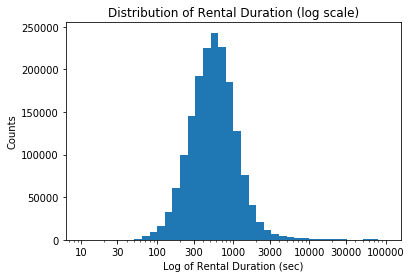

In [ ]:
base_color = sns.color_palette()[0]

np.log10(bike_rental.duration_sec.describe())

log_duration_bins = 10 ** np.arange(1, 5.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=bike_rental, x='duration_sec', bins=log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Rental Duration (log scale)')
plt.xlabel('Log of Rental Duration (sec)')
plt.ylabel('Counts');

## Duration seconds vs. The time members started riding bikes 
Heatmap plotting duration seconds and the time members started riding bikes (in hours) produces two highlights period. There are extreme many members who ride bikes at 8:00 in the morning and 17:00 in the afternoon.

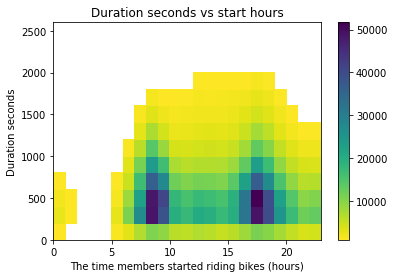

In [ ]:
bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 2500')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)

bike_rental_cut_duration_outliers['start_hour'] = bike_rental_cut_duration_outliers.start_time.apply(lambda x: x.time().hour)

hour_bins_x = np.arange(0, bike_rental_cut_duration_outliers.start_hour.max()+1, 1)
hour_bins_y = np.arange(0, bike_rental_cut_duration_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_rental_cut_duration_outliers, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=1000)
plt.colorbar()
plt.title('Duration seconds vs start hours');
plt.xlabel('The time members started riding bikes (hours)')
plt.ylabel('Duration seconds');

## Duration seconds vs. Member's birth year
Members who were born in 1990s ride bikes more often and longer

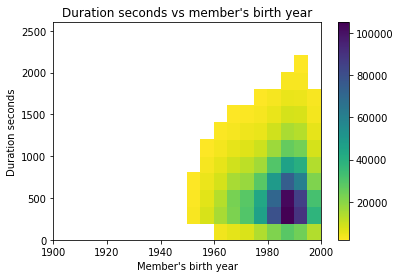

In [ ]:
birth_bins_x = np.arange(1900, bike_rental_cut_duration_outliers.member_birth_year.max()+5, 5)
birth_bins_y = np.arange(0, bike_rental_cut_duration_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_rental_cut_duration_outliers, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r', cmin=2000)
plt.colorbar()
plt.title('Duration seconds vs member\'s birth year');
plt.xlabel('Member\'s birth year')
plt.ylabel('Duration seconds');

## Duration seconds and Month by Member's gender
It shows that Female more likely to ride bikes longer than Male especially on summer season

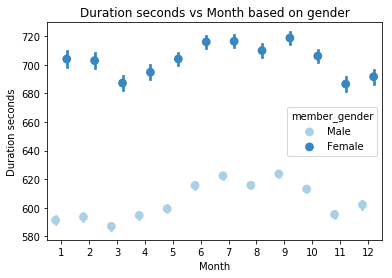

In [ ]:
bike_rental_cut_duration_outliers['month'] = bike_rental_cut_duration_outliers.start_time.apply(lambda x: x.date().month)

sns.pointplot(data=bike_rental_cut_duration_outliers, x='month', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles='', dodge=0.4)
plt.title('Duration seconds vs Month based on gender')
plt.xlabel('Month')
plt.ylabel('Duration seconds');

## Duration seconds and Month by User type
It shows that Customers more likely to ride bikes longer than Subscribers especially on summer season

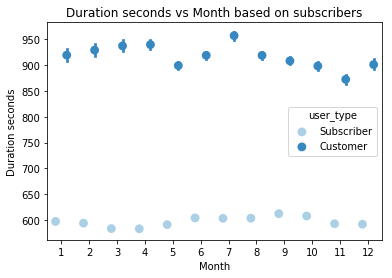

In [ ]:
sns.pointplot(data=bike_rental_cut_duration_outliers, x='month', y='duration_sec', hue='user_type',
              palette = 'Blues', linestyles='', dodge=0.4)
plt.title('Duration seconds vs Month based on subscribers')
plt.xlabel('Month')
plt.ylabel('Duration seconds');

In [ ]:
!jupyter nbconvert "Bike_rental_explanation.ipynb" --to slides --post serve --template output_toggle